In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv('Q1dataset.csv')
df.head()

,Job Name,Department,Date Posted,Last Date to Apply
0,"Full Time New Job Positions .Net, .Netcore, Fl...",IT Jobs,3/12/2021,3/25/2021
1,Full Time Senior Web Developer Jobs in Pakistan,IT Jobs,3/12/2021,3/27/2021
2,Full Time Russian Speakers Jobs in Pakistan,Customer Service Jobs,3/12/2021,3/23/2021
3,Full Time Customer Support Specialist - Intern...,Customer Service Jobs,3/9/2021,3/21/2021
4,Full Time English Speaker - International Busi...,Customer Service Job,3/5/2021,3/17/2021


In [4]:
relevant_columns = ['Job Name', 'Department']
df = df[relevant_columns].copy()
df

,Job Name,Department
0,"Full Time New Job Positions .Net, .Netcore, Fl...",IT Jobs
1,Full Time Senior Web Developer Jobs in Pakistan,IT Jobs
2,Full Time Russian Speakers Jobs in Pakistan,Customer Service Jobs
3,Full Time Customer Support Specialist - Intern...,Customer Service Jobs
4,Full Time English Speaker - International Busi...,Customer Service Job
...,...,...
6675,Full Time Senior Software Engineer Job in Pak...,Computer Software Job
6676,Full Time Commercial Experience Executive Job ...,Admin Job
6677,Full Time Business Development Executive Job i...,Computer Software Job
6678,Full Time 3D Modeler / CG Artist Game Jobs in ...,Computer Software Jobs


In [5]:
def normalize_job_title(job_title):
    job_title = job_title.lower()
    job_title = job_title.replace("jobs", "job")
    # replacing the dashes with the space
    job_title = job_title.replace(" - ", " ")
    job_title = job_title.replace("-", " ")
    # removing the space before and after title
    job_title = job_title.strip()
    return job_title

# here we are normalizing it because we saw in our data set that values were written in more then one formate
df['Normalized Job Name'] = df['Job Name'].apply(normalize_job_title)

# replacing the different words used for same job with same keyword
job_title_groups = {
    'Software Engineer': ['software engineer', 'senior software engineer', 'lead software engineer'],
    'Data Scientist': ['data scientist', 'senior data scientist', 'lead data scientist'],
}


df


,Job Name,Department,Normalized Job Name
0,"Full Time New Job Positions .Net, .Netcore, Fl...",IT Jobs,"full time new job positions .net, .netcore, fl..."
1,Full Time Senior Web Developer Jobs in Pakistan,IT Jobs,full time senior web developer job in pakistan
2,Full Time Russian Speakers Jobs in Pakistan,Customer Service Jobs,full time russian speakers job in pakistan
3,Full Time Customer Support Specialist - Intern...,Customer Service Jobs,full time customer support specialist internat...
4,Full Time English Speaker - International Busi...,Customer Service Job,full time english speaker international busine...
...,...,...,...
6675,Full Time Senior Software Engineer Job in Pak...,Computer Software Job,full time senior software engineer job in pak...
6676,Full Time Commercial Experience Executive Job ...,Admin Job,full time commercial experience executive job ...
6677,Full Time Business Development Executive Job i...,Computer Software Job,full time business development executive job i...
6678,Full Time 3D Modeler / CG Artist Game Jobs in ...,Computer Software Jobs,full time 3d modeler / cg artist game job in p...


In [6]:
#this is the application of the above, if the cell has name of that group then replace it with that group
for group_name, job_titles in job_title_groups.items():
    df.loc[df['Normalized Job Name'].isin(job_titles), 'Normalized Job Name'] = group_name

# this code is to count all the similar jobs and put it after the title    
job_demand = df['Normalized Job Name'].value_counts().reset_index()
job_demand.columns = ['Job Position', 'Job Postings']

sorted_job_demand = job_demand.sort_values(by='Job Postings', ascending=False)
print("Most In-demand Job Positions in Pakistan:")
print(sorted_job_demand.head(10))  

Most In-demand Job Positions in Pakistan:
                                        Job Position  Job Postings
0         full time graphic designer job in pakistan           103
1          full time sales executive job in pakistan            58
2      full time wordpress developer job in pakistan            47
3            full time web developer job in pakistan            46
4            full time php developer job in pakistan            39
5           full time content writer job in pakistan            37
6  full time territory sales supervisor job in pa...            36
7  full time business development executive job i...            33
8      full time data entry operator job in pakistan            31
9        full time android developer job in pakistan            31


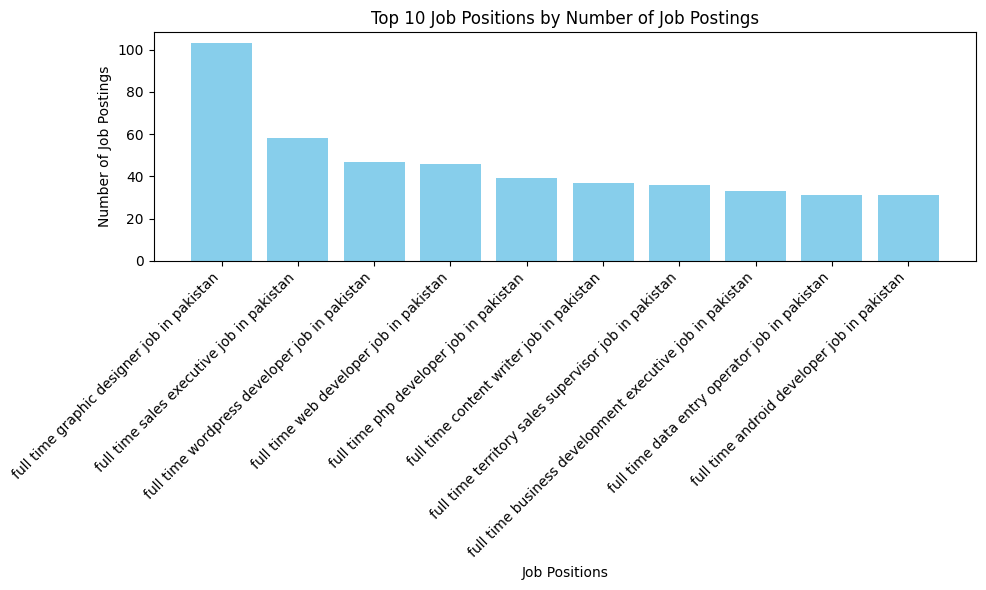

In [8]:
import matplotlib.pyplot as plt
top_10_jobs =sorted_job_demand.head(10)
job_names = top_10_jobs['Job Position']
job_postings = top_10_jobs['Job Postings']
plt.figure(figsize=(10, 6))
plt.bar(job_names, job_postings, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Positions')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Job Positions by Number of Job Postings')
plt.tight_layout()
plt.show()
